In [11]:
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import mtd_execution
import seaborn as sns
from mtdnetwork.statistic import utils
import pandas as pd
import logging
from mtdnetwork.mtd.osdiversityassignment import DiversityAssignment

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [12]:
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneous, random, alternative, single, None
"""
evaluation = mtd_execution(start_time=0, finish_time=1, mtd_interval=200, scheme='simultaneous', total_nodes=80, new_network=True)

Adversary: Start SCAN_HOST at 0.0s.
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: IPShuffle triggered 0.0s
MTD: OSDiversity triggered 0.0s
MTD: PortShuffle triggered 0.0s
MTD: ServiceDiversity triggered 0.0s
MTD: CompleteTopologyShuffle deployed in the network at 0.0s.
MTD: OSDiversity deployed in the network at 0.0s.


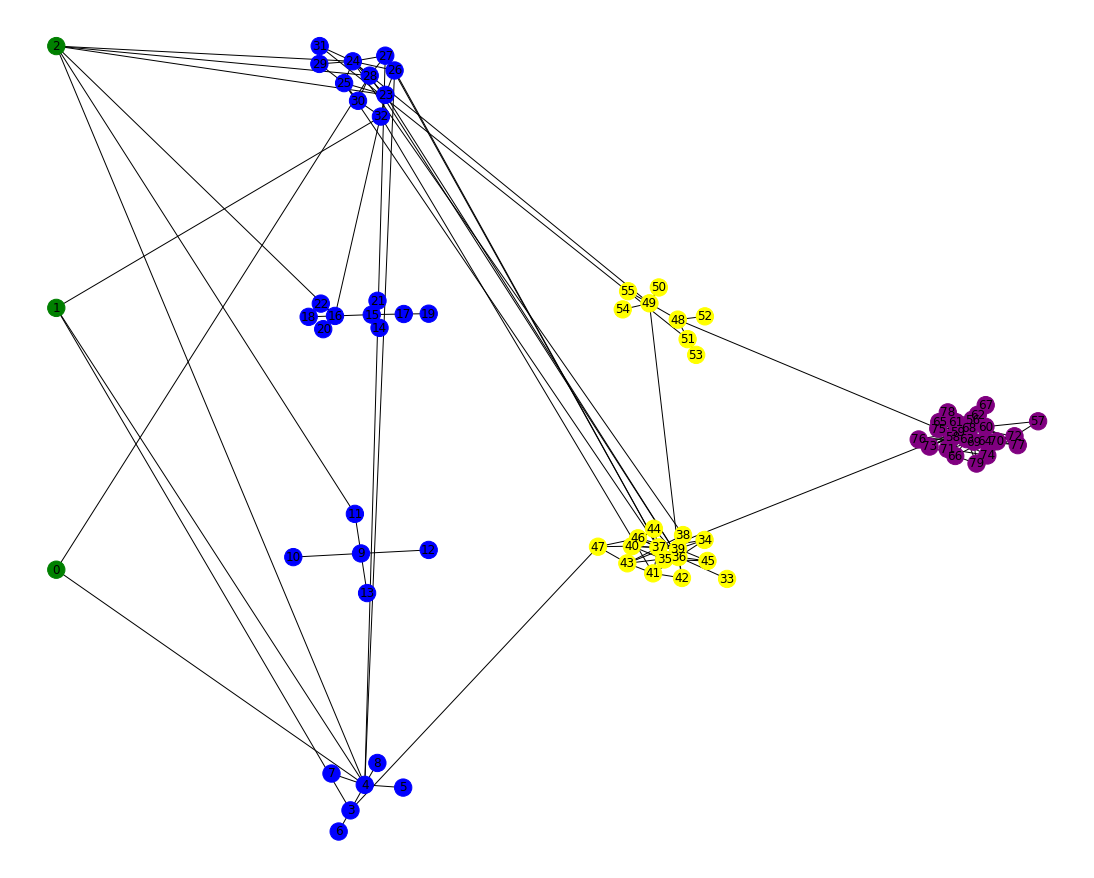

In [13]:
evaluation.get_network().draw()
plt.show()

In [14]:
evaluation.visualise_mtd_operation()

KeyError: 'name'

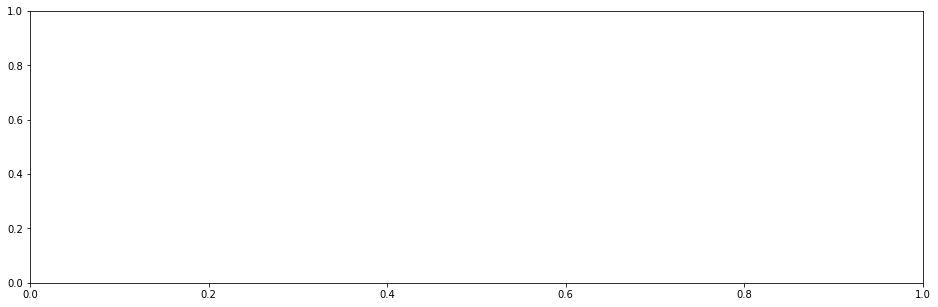

In [15]:
evaluation.visualise_attack_operation_group_by_host()

In [ ]:
evaluation.visualise_attack_operation()

In [ ]:
evaluation.compromise_record_by_attack_action()

In [ ]:
evaluation.compromise_record_by_attack_action('SCAN_PORT')

In [ ]:
evaluation.compromise_record_by_attack_action('EXPLOIT_VULN')

In [ ]:
evaluation.compromise_record_by_attack_action('BRUTE_FORCE')

In [ ]:
evaluation.time_to_compromise_by_checkpoint()

In [ ]:
evaluation.mtd_execution_frequency()

In [ ]:
evaluation.attack_success_rate()